# Unsupervised learning- clustering

# 0. Reading in png-images into a dataset

This is the code how i reverted the 165 gif-images to a dataset. You don't need to know this. It is an illustration in case you will need/want to do something like this in a project later on.



# 1. loading packages and dataset

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
#importing dataset
import pickle
with open("pickled_yale.pkl", "br") as fh:
    data = pickle.load(fh)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 77760 entries, 0_1 to 0_77760
dtypes: int64(77760)
memory usage: 97.9 MB


In [38]:
data.iloc[1,:].describe()

count    77760.000000
mean       200.723508
std         72.890488
min          8.000000
25%        139.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: 1, dtype: float64

The data is not normalized here, so we will need to do this ourself. With pictures, you normalize bij dividing by 255 (range of possible pixel-values)

In [39]:
data_n = data/255

In [40]:
# 2. K-means clustering

In [41]:
data_n.iloc[1,:].describe()

count    77760.000000
mean         0.787151
std          0.285845
min          0.031373
25%          0.545098
50%          1.000000
75%          1.000000
max          1.000000
Name: 1, dtype: float64

# 2. K-means clustering
## clustering
We will now do clustering: in an unsupervised way find clusters of data which are more alike internally, and more dissimilar from other clusters.

Because we know we have 15 characters , we will ask k-Means to look for 15 clusters within the entire data.

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=130)
kmeans.fit(data_n)
pred = kmeans.predict(data_n)

In [71]:
pred

array([ 7,  7,  7,  5,  7,  7,  4,  7,  7,  7,  7,  1,  1,  1,  5,  1,  1,
        1,  1,  1,  1,  1,  0,  0, 14,  5, 14, 14,  4, 14, 14,  9, 14, 12,
       12, 12,  5, 12, 12,  4, 12, 12, 12, 12,  8,  8,  8,  5,  8,  8,  4,
        8,  8,  8,  8,  2, 10, 10,  5, 10, 10,  2, 10, 10, 10, 10,  6,  9,
        0,  5, 14, 14,  4, 14, 14, 14, 14,  9, 14,  9,  5,  6, 14,  4,  0,
        9, 11,  6,  0,  0,  9,  5,  9,  9,  4,  9,  9,  9,  9, 13, 13,  6,
        5,  6,  6, 13,  6,  6,  6,  6,  3,  3,  3,  5,  3,  3,  3,  3,  3,
        3,  3,  7,  8, 13,  5,  8,  8,  8, 13, 13, 13, 13, 11, 11, 11,  5,
       11, 11,  4, 11, 11, 11, 11,  2,  2,  2,  5,  2,  2, 10,  2,  2,  2,
        2, 14,  6,  0,  5,  6, 14,  4,  0,  6,  6,  0], dtype=int32)

I know that my pictures are in sequence, meaning the first 11 are 1 person, the next 11 another,... And we can already see that our clusters follow this pattern. 

In [72]:
cluster_0 = np.arange(0,data.shape[0])[pred == 0]
cluster_1 = np.arange(0,data.shape[0])[pred == 1]
cluster_2 = np.arange(0,data.shape[0])[pred == 2]
cluster_3 = np.arange(0,data.shape[0])[pred == 3]
cluster_4 = np.arange(0,data.shape[0])[pred == 4]
cluster_5 = np.arange(0,data.shape[0])[pred == 5]
cluster_6 = np.arange(0,data.shape[0])[pred == 6]
cluster_7 = np.arange(0,data.shape[0])[pred == 7]
cluster_8 = np.arange(0,data.shape[0])[pred == 8]
cluster_9 = np.arange(0,data.shape[0])[pred == 9]
cluster_10 = np.arange(0,data.shape[0])[pred == 10]
cluster_11 = np.arange(0,data.shape[0])[pred == 11]
cluster_12 = np.arange(0,data.shape[0])[pred == 12]
cluster_13 = np.arange(0,data.shape[0])[pred == 13]
cluster_14 = np.arange(0,data.shape[0])[pred == 14]

In [73]:
import collections, numpy
collections.Counter(pred)

Counter({np.int32(14): 16,
         np.int32(5): 15,
         np.int32(6): 14,
         np.int32(8): 13,
         np.int32(9): 12,
         np.int32(2): 11,
         np.int32(7): 10,
         np.int32(1): 10,
         np.int32(11): 10,
         np.int32(3): 10,
         np.int32(4): 9,
         np.int32(0): 9,
         np.int32(12): 9,
         np.int32(10): 9,
         np.int32(13): 8})

Let's take a look at the pictures for each cluster to see how it performed.

<Figure size 1500x1500 with 0 Axes>

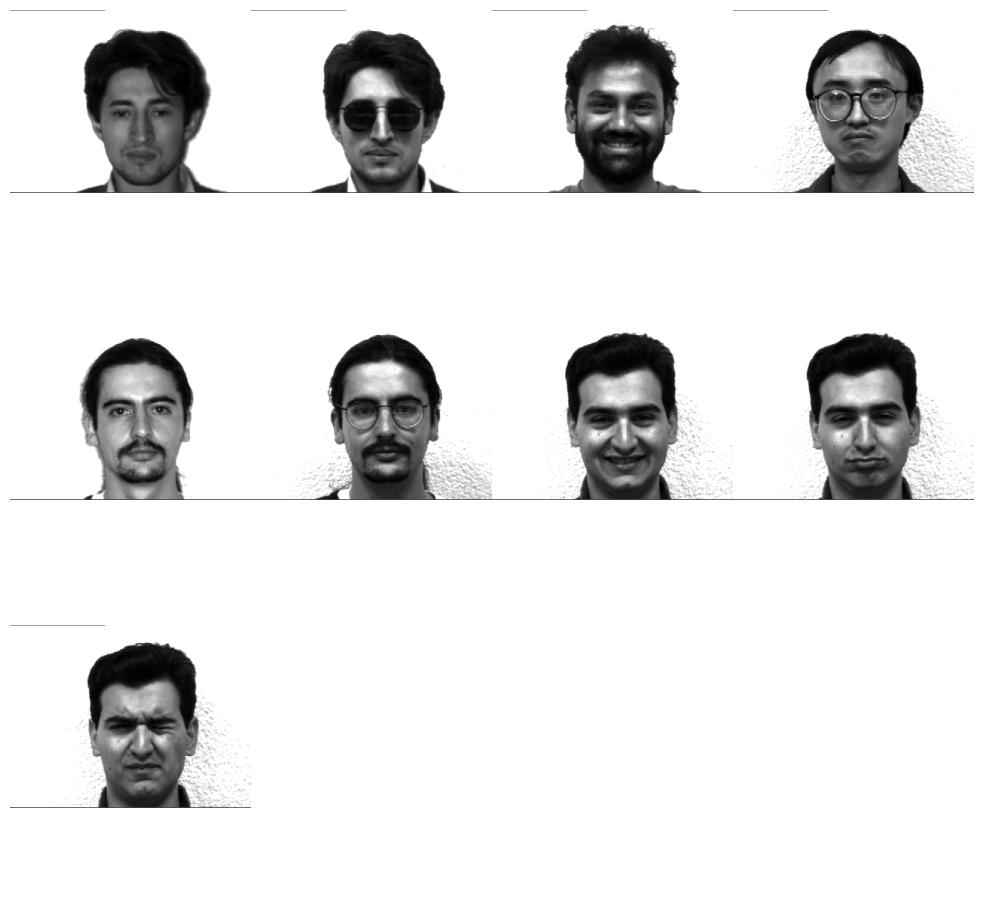

In [46]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(3,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_0):
        im = np.array(data.iloc[cluster_0[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 1000x1000 with 0 Axes>

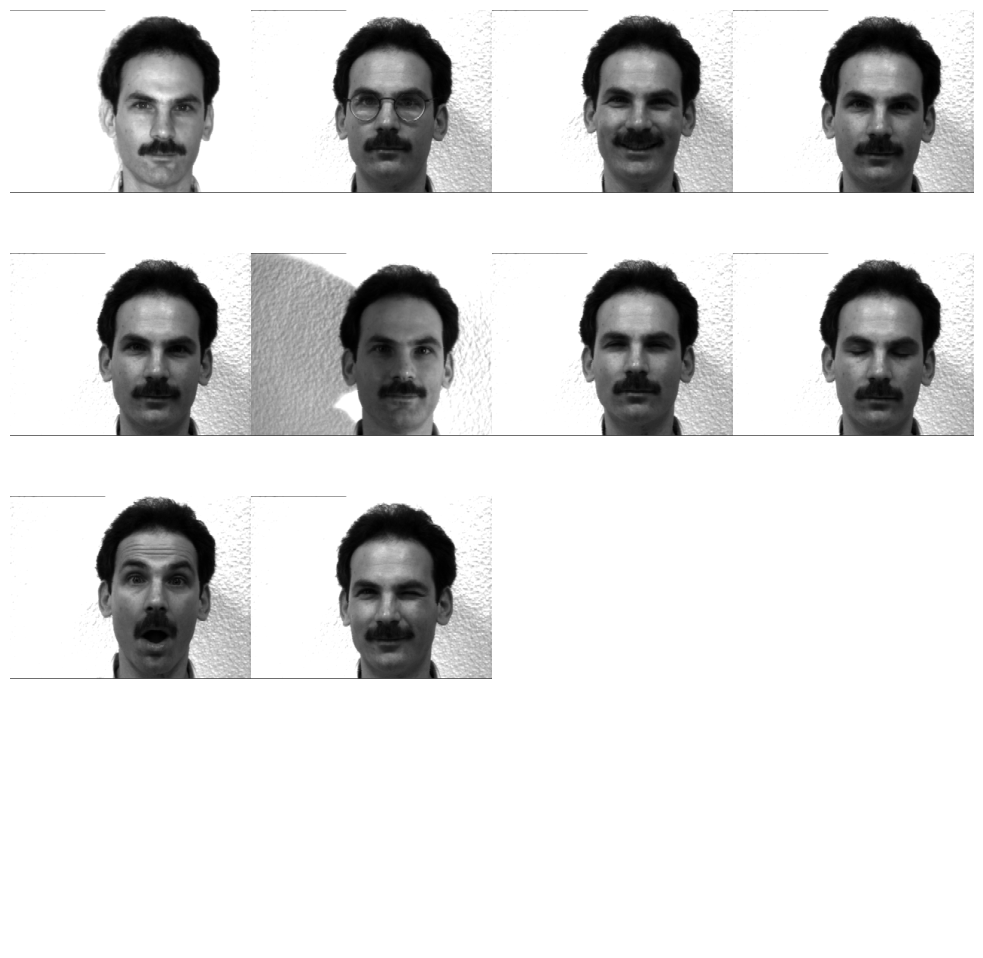

In [47]:
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(4,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_1):
        im = np.array(data.iloc[cluster_1[i],:]).reshape(243,320)
        ax.imshow(im, cmap="gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 1500x1500 with 0 Axes>

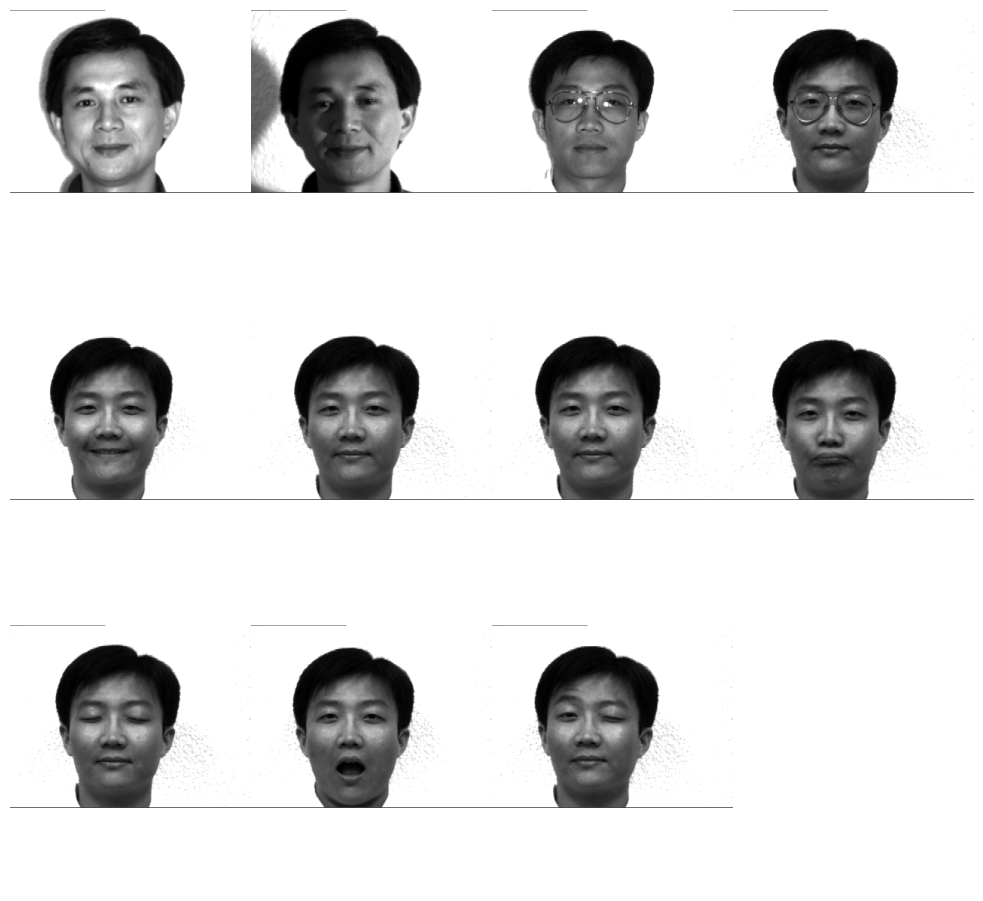

In [48]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(3,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_2):
        im = np.array(data.iloc[cluster_2[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 1500x1500 with 0 Axes>

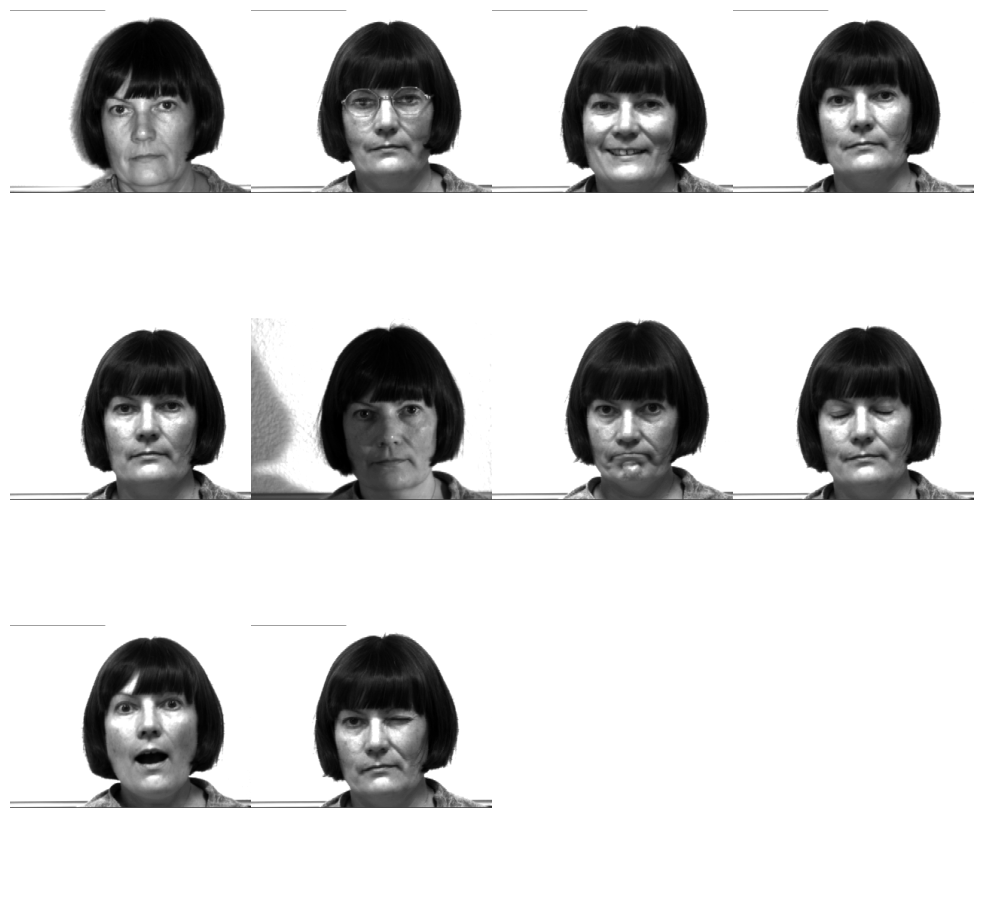

In [49]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(3,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    if i < len(cluster_3):
        im = np.array(data.iloc[cluster_3[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Here, the algorithm confused 2 people.

<Figure size 1500x1500 with 0 Axes>

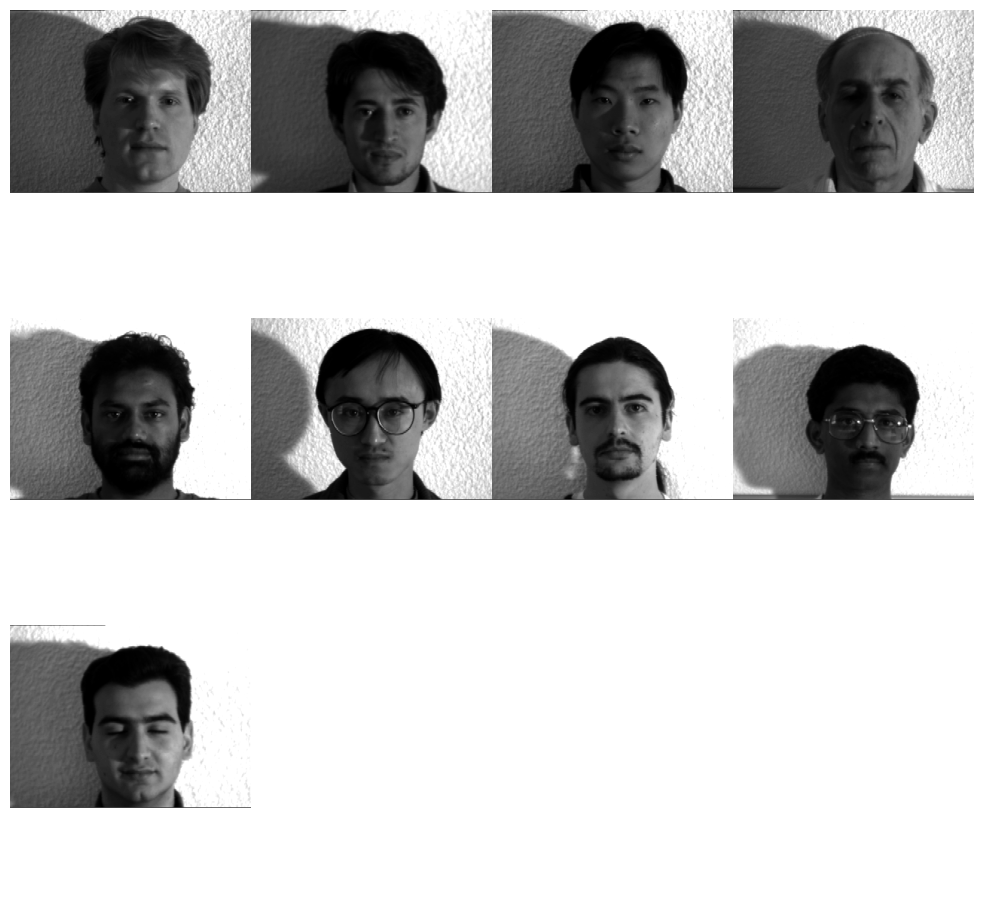

In [50]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(3,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_4):
        im = np.array(data.iloc[cluster_4[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Some clusters are ok, some clusters are responding to different things (e.g the one clusters that is clustered based on the shadow).

# 3. t-sne

We will visualize the clusters using t-sne.

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5, random_state=123 )
X_embedded = tsne.fit_transform(data_n)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 165 samples in 0.074s...
[t-SNE] Computed neighbors for 165 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 165 / 165
[t-SNE] Mean sigma: 18.627331
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.357746
[t-SNE] KL divergence after 1000 iterations: 0.160766


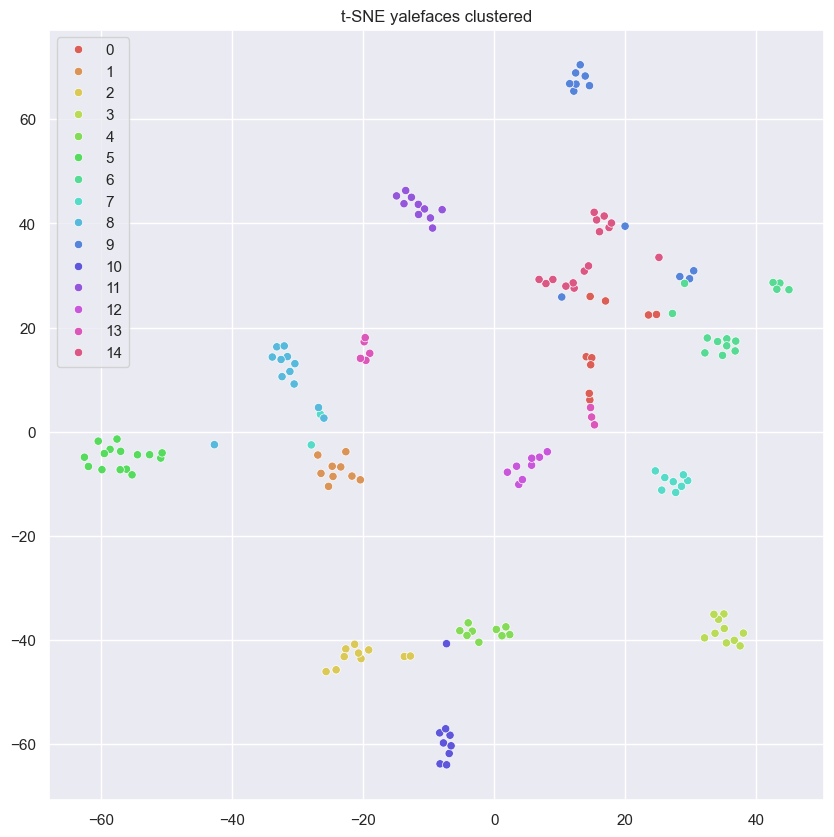

In [52]:
# sns settings
sns.set(rc={'figure.figsize':(10,10)})


# colors
palette = sns.color_palette("hls", len(set(pred)))
#
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=pred, legend='full', palette= palette)
plt.title("t-SNE yalefaces clustered")
plt.show()

You can clearly see that some clusters are well-defined , while others have a bit more difficulty. We can indeed see that some cluster seem to exist of 2 parts (or 2 people as we could see in the pictures).


<Figure size 1500x1500 with 0 Axes>

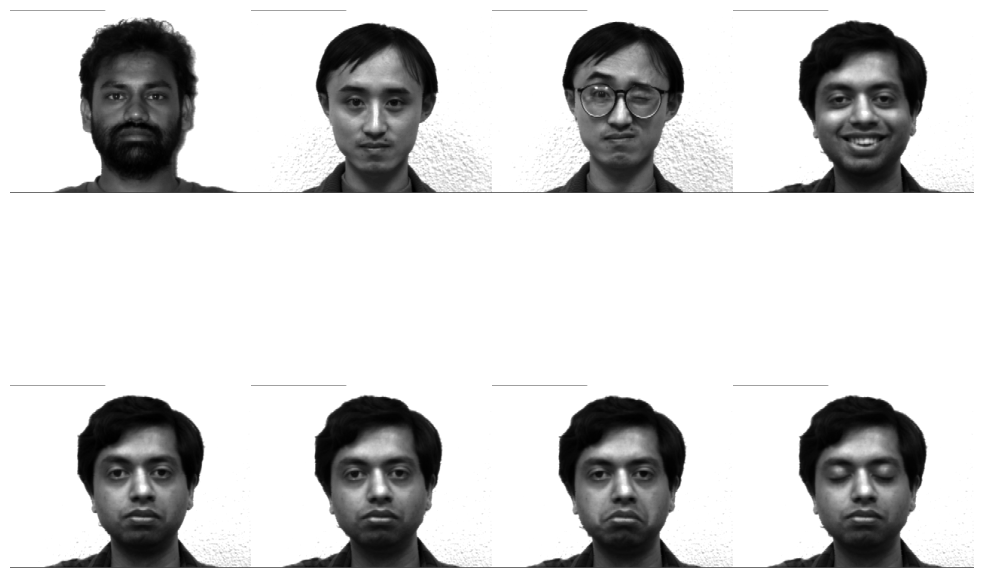

In [53]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(2,4)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_6):
        im = np.array(data.iloc[cluster_6[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Change the cluster number above to see if the conclusion that you draw from the t-sne map are correct.

# 4. PCA, then k-means

We first do a PCA, with the maximum number of components (which is the minimum of the number of observations and the number of features, here 165)

In [54]:
number_of_components = 165

from sklearn.decomposition import PCA
pca_model = PCA(n_components=165, svd_solver='full')
pca_model.fit(data_n)

PCA(n_components=165, svd_solver='full')

Lets look at the explained variance and scree plot to choose the best number of components

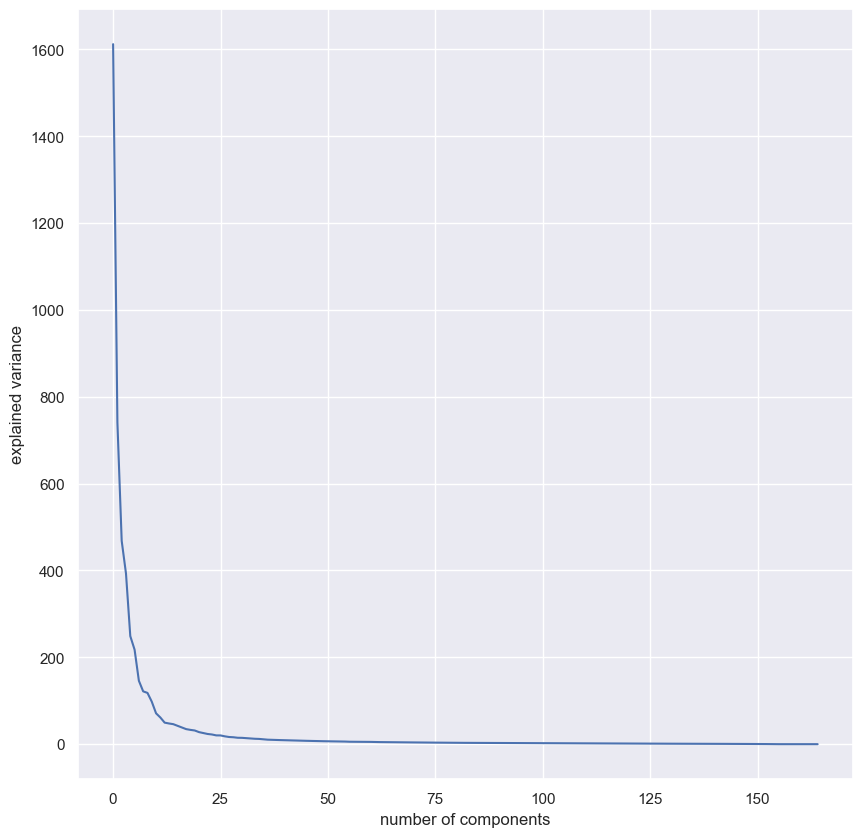

In [55]:
import matplotlib.pyplot as plt
plt.plot(pca_model.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

134 compontents have an eigenvalue above 1. But the scree plot clearly shows a nod way sooner. Let's zoom in on the first 25 components to get a better idea.

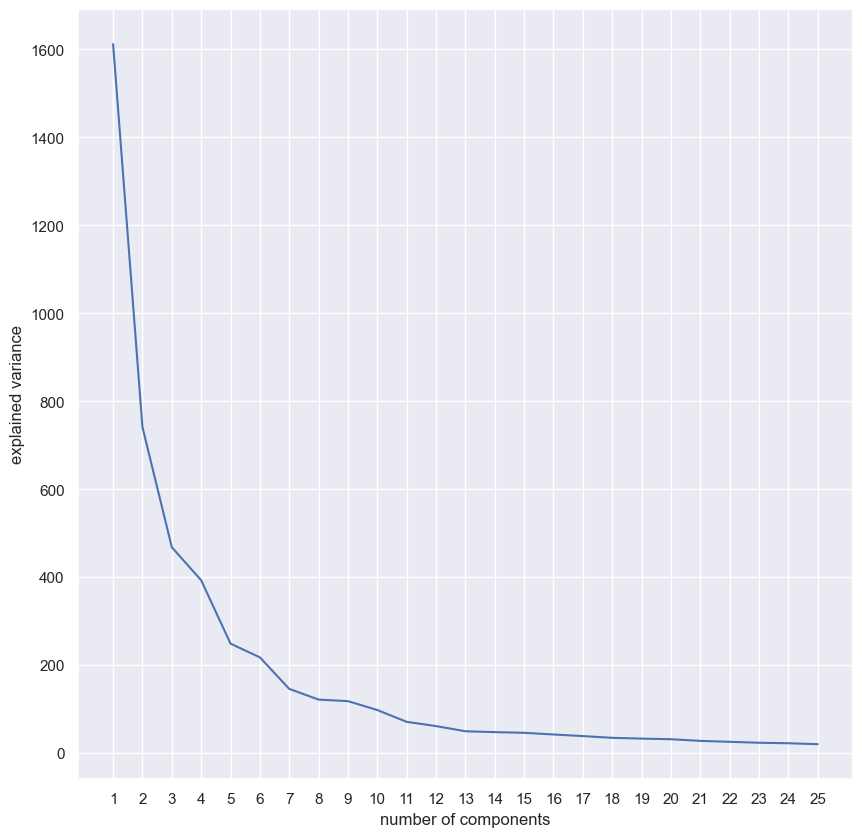

In [56]:
import numpy as np
EV = pca_model.explained_variance_[0:25]

plt.plot(EV)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(EV)), np.arange(1, len(EV)+1))  #Otherwise the x-axis starts at 1)
plt.show()

I would put the nod around 9 or 11  components.

In [57]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.30539098, 0.44580402, 0.53449111, 0.60893433, 0.65608082,
       0.69731234, 0.72497419, 0.74801288, 0.77038369, 0.78893139,
       0.80239424, 0.81402412, 0.82341676, 0.83244582, 0.84117807,
       0.84918179, 0.8565064 , 0.86307638, 0.86931442, 0.87528609,
       0.88054501, 0.8853994 , 0.88984651, 0.89407488, 0.89791057,
       0.90172374, 0.9051459 , 0.90827151, 0.91129079, 0.91408624,
       0.91684731, 0.91947524, 0.92197392, 0.92432914, 0.92661818,
       0.92874491, 0.93070394, 0.93258924, 0.93444052, 0.93621775,
       0.93793535, 0.93959107, 0.9411924 , 0.94273786, 0.94423866,
       0.94570243, 0.94711141, 0.94846392, 0.94980919, 0.95110181,
       0.95236811, 0.9536028 , 0.95480582, 0.95597847, 0.95711597,
       0.95818045, 0.95923829, 0.9602731 , 0.96128403, 0.96227839,
       0.96326888, 0.96419946, 0.96510801, 0.96599238, 0.9668636 ,
       0.9677083 , 0.96853554, 0.96934386, 0.97014623, 0.97092028,
       0.97167979, 0.97243206, 0.97314447, 0.97384952, 0.97454

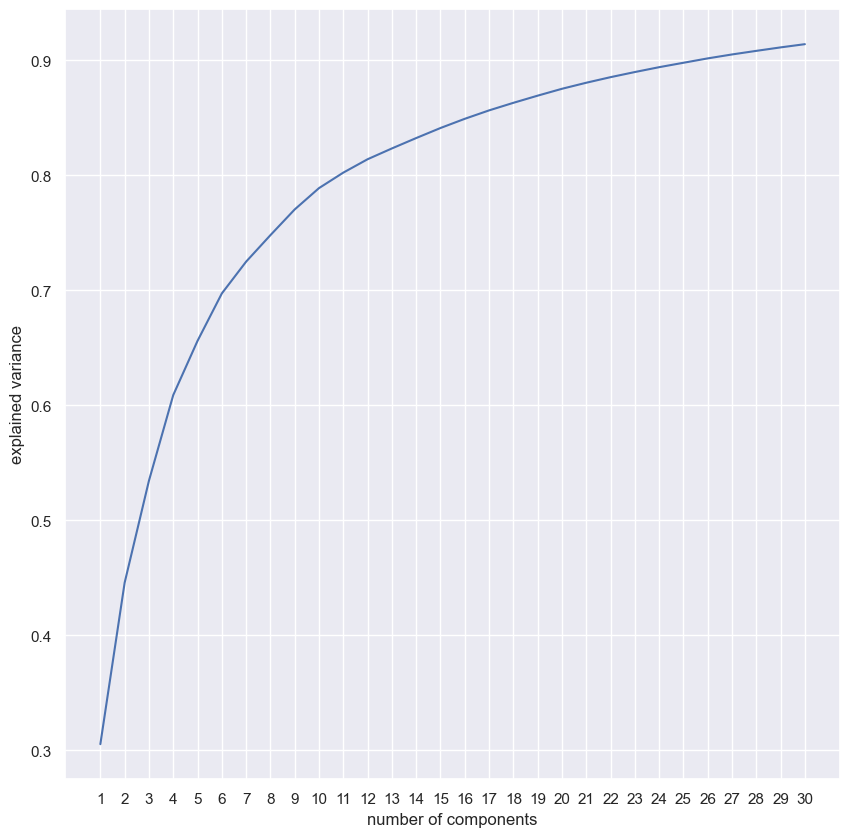

In [58]:
CS = np.cumsum(pca_model.explained_variance_ratio_)[0:30]
plt.plot(CS)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(CS)), np.arange(1, len(CS)+1))

plt.show()

The cumulative explained variance becomes larger than 80% at component 11. So, we redo the PCA with 11 components.


In [59]:
pca_model = PCA(n_components=11, svd_solver='full')
pca_model.fit(data_n)
pca_data= pca_model.transform(data_n)

In [60]:
pca_data.shape

(165, 11)

Now, we do the k-means clustering with the PCA-data.

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=123)
kmeans.fit(pca_data)
pred_pca = kmeans.predict(pca_data)
pred_pca

array([11, 11, 11,  5,  3, 11,  4, 11, 11, 11, 11,  3,  3,  3,  5,  3,  3,
        7,  3,  3,  3,  3, 13, 13,  1,  5,  1,  1,  4,  1,  1,  1,  1,  7,
        7,  7,  5,  7,  7,  4,  7,  7,  7,  7, 14, 14, 14,  5, 14, 14,  4,
       14, 14, 14, 14,  2,  9,  9,  5,  9,  9,  2,  9,  9,  9,  9,  8,  1,
        1,  5,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  5,  8,  1,  4, 13,
       12,  6,  8,  1, 13, 12,  5, 12, 12,  4, 12, 12, 12, 12, 13, 13,  8,
        5,  8,  8, 13,  8,  8,  8,  8,  0,  0,  0,  5,  0,  0,  0,  0,  0,
        0,  0, 11,  3, 14,  5,  3,  3,  3, 13, 13, 14, 14,  6,  6,  6,  5,
        6,  6,  4,  6,  6,  6,  6, 10, 10, 10,  5, 10, 10,  2, 10, 10, 10,
       10,  1,  8,  1,  5,  8,  1,  4, 13,  8,  8, 13], dtype=int32)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 165 samples in 0.000s...
[t-SNE] Computed neighbors for 165 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 165 / 165
[t-SNE] Mean sigma: 9.157660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.409058
[t-SNE] KL divergence after 1000 iterations: 0.180967


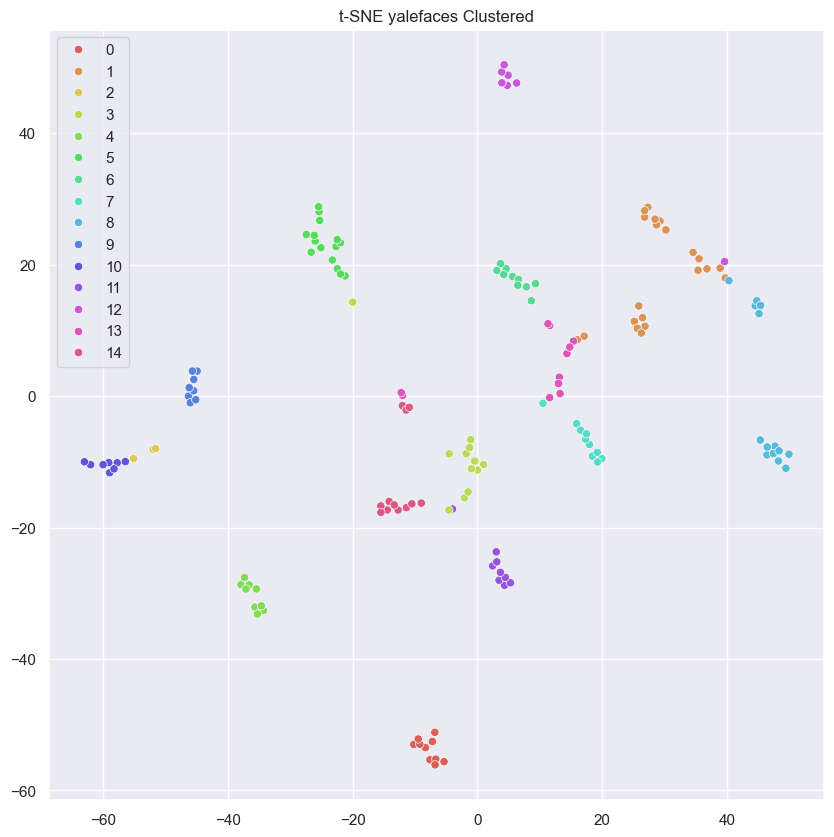

In [62]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(verbose=1, perplexity=5, random_state=124 )
X_embedded_pca = tsne.fit_transform(pca_data)

sns.set(rc={'figure.figsize':(10,10)})
# colors
palette = sns.color_palette("hls", len(set(pred_pca)))
#
# plot
sns.scatterplot(x=X_embedded_pca[:,0], y=X_embedded_pca[:,1], hue=pred_pca, legend='full', palette= palette)
plt.title("t-SNE yalefaces Clustered")
plt.show()

The clusters seem a bit better divided now. But cluster 2 hardly has any points, while cluster 6  seems to consist of 2 people .

In [63]:
cluster_0 = np.arange(0,pca_data.shape[0])[pred_pca == 0]
cluster_1 = np.arange(0,pca_data.shape[0])[pred_pca == 1]
cluster_2 = np.arange(0,pca_data.shape[0])[pred_pca == 2]
cluster_3 = np.arange(0,pca_data.shape[0])[pred_pca == 3]
cluster_4 = np.arange(0,pca_data.shape[0])[pred_pca == 4]
cluster_5 = np.arange(0,pca_data.shape[0])[pred_pca == 5]
cluster_6 = np.arange(0,pca_data.shape[0])[pred_pca == 6]
cluster_7 = np.arange(0,pca_data.shape[0])[pred_pca == 7]
cluster_8 = np.arange(0,pca_data.shape[0])[pred_pca == 8]
cluster_9 = np.arange(0,pca_data.shape[0])[pred_pca == 9]
cluster_10 = np.arange(0,pca_data.shape[0])[pred_pca == 10]
cluster_11 = np.arange(0,pca_data.shape[0])[pred_pca == 11]
cluster_12 = np.arange(0,pca_data.shape[0])[pred_pca == 12]
cluster_13 = np.arange(0,pca_data.shape[0])[pred_pca == 13]
cluster_14 = np.arange(0,pca_data.shape[0])[pred_pca == 14]

You can play around with the cluster number to check te results.

<Figure size 1500x1500 with 0 Axes>

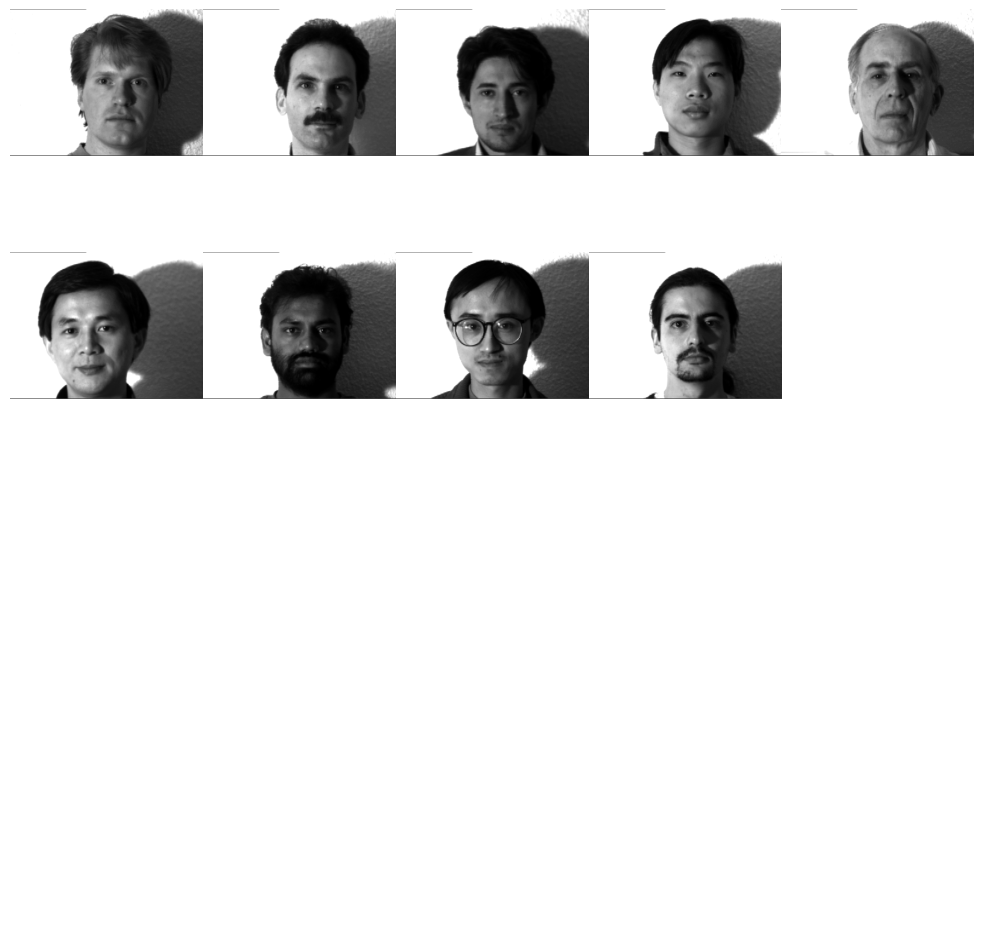

In [74]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(4,5)
axes = ax_array.flatten()
for i , ax in enumerate(axes):
    if i < len(cluster_12):
        im = np.array(data.iloc[cluster_5[i],:]).reshape(243,320)
        ax.imshow(im, cmap='gray')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

# 5. Linear discriminant analysis

If we want to reduce the dimension to be able to classify our data, we can also use LDA, which performs dimension reduction and classification simultaneously.
We will first create an outcome variable (remember, we know that our pictures are in sequence). Just to show how this algorithm works, we will create a small 'test-set' with one picture from each person.

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create labels
y_train = numpy.concatenate([([i]*10) for i in range(15)], axis=0) 
y_test = np.linspace(0,14,15)

# Create test-set
X_train = data_n.copy()
X_test = X_train.iloc[::11,:]
X_train = X_train.drop(np.linspace(0,154,15))


lda = LDA(n_components=11)
lda.fit(X_train,y_train)
lda_data =lda.fit_transform(X_train,y_train)


In [79]:
y_predict = lda.predict(X_test)
print(y_predict)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  7]


As we can see, only the last picture was classified incorrectly.